In [1]:

# Standards Librairies import

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Circle
import folium
import seaborn as sns
import plotly.express as px
import numpy as np
import pickle
from time import time
from sklearn.preprocessing import OneHotEncoder, StandardScaler,RobustScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import plotly.graph_objs as go
from math import pi
import scipy.cluster.hierarchy as sch
import scipy.cluster.hierarchy as shc

# Clustering Librairies import
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from kmodes.kprototypes import KPrototypes

# Cluster evaluation libraries
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import completeness_score



In [2]:
df=pd.read_csv("df_client_segmentation.csv").set_index("customer_unique_id")
print(df.shape)
df.head(5)

(92063, 25)


,total_orders,customer_city,customer_state,order_status,payment_sequential,payment_type,payment_installments,order_purchase_timestamp,appliances,arts,...,garden_pets,health_beauty,home_furniture,office,other,sports_leisure,mean_review_score,most_purchased_item,mean_purchases,mean_delivery_days
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,cajamar,SP,delivered,1,credit_card,8,2018-05-10 10:56:27,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,5.0,home_furniture,129.90,6.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,osasco,SP,delivered,1,credit_card,1,2018-05-07 11:11:27,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,4.0,health_beauty,18.90,3.0
0000f46a3911fa3c0805444483337064,1,sao jose,SC,delivered,1,credit_card,8,2017-03-10 21:05:03,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,3.0,office,69.00,25.0
0000f6ccb0745a6a4b88665a16c9f078,1,belem,PA,delivered,1,credit_card,4,2017-10-12 20:29:41,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,electronics,25.99,20.0
0004aac84e0df4da2b147fca70cf8255,1,sorocaba,SP,delivered,1,credit_card,6,2017-11-14 19:45:42,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,electronics,180.00,13.0


In [3]:
# changement de type de colonne 'order purchase timestamp' au datetime64

df['order_purchase_timestamp']=df['order_purchase_timestamp'].astype('datetime64[ns]')

In [4]:
df.dtypes

total_orders                         int64
customer_city                       object
customer_state                      object
order_status                        object
payment_sequential                   int64
payment_type                        object
payment_installments                 int64
order_purchase_timestamp    datetime64[ns]
appliances                         float64
arts                               float64
auto                               float64
construction                       float64
electronics                        float64
fashion                            float64
food_drinks                        float64
garden_pets                        float64
health_beauty                      float64
home_furniture                     float64
office                             float64
other                              float64
sports_leisure                     float64
mean_review_score                  float64
most_purchased_item                 object
mean_purcha

In [5]:
df1=df.copy()

# Valuer unique de status de commande 
df1.order_status.value_counts()

delivered    92057
canceled         6
Name: order_status, dtype: int64

In [6]:
# Valuer unique de type de paiement

df1.payment_type.value_counts()

credit_card    69881
boleto         18336
voucher         2430
debit_card      1416
Name: payment_type, dtype: int64

In [7]:

X = df1.copy().drop(["most_purchased_item","customer_city"], axis=1)

# sélectionner des données catégorielles
categorical_columns = X.select_dtypes(['category','object']).columns

#sélectionner des colonnes numériques

numerical_columns = X.select_dtypes(['int64','float64']).columns

# changement les données catégorielles avec avec OneHotEncoder
ohe = OneHotEncoder(sparse=False)

# normaliser les données avec RobustScaler
rs = RobustScaler()

# On applique la transformation sur les colonnes numerique sauf les variables dummy 
X[numerical_columns] = rs.fit_transform(X[numerical_columns])

ohe.fit(X[categorical_columns])

OneHotEncoder(sparse=False)

In [8]:
categorical_columns

Index(['customer_state', 'order_status', 'payment_type'], dtype='object')

In [9]:
X = pd.merge(X[numerical_columns], 
          pd.DataFrame(columns = ohe.get_feature_names().tolist(),
              data = ohe.fit_transform(X[categorical_columns])).set_index(X.index),
        left_index = True, right_index = True)

In [10]:
X

,total_orders,payment_sequential,payment_installments,appliances,arts,auto,construction,electronics,fashion,food_drinks,...,x0_SC,x0_SE,x0_SP,x0_TO,x1_canceled,x1_delivered,x2_boleto,x2_credit_card,x2_debit_card,x2_voucher
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
0000f46a3911fa3c0805444483337064,0.0,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,1.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1.0,0.0,2.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
fffea47cd6d3cc0a88bd621562a9d061,0.0,0.0,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
ffff371b4d645b6ecea244b27531430a,0.0,0.0,-0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [14]:
X.columns

Index(['total_orders', 'payment_sequential', 'payment_installments',
       'appliances', 'arts', 'auto', 'construction', 'electronics', 'fashion',
       'food_drinks', 'garden_pets', 'health_beauty', 'home_furniture',
       'office', 'other', 'sports_leisure', 'mean_review_score',
       'mean_purchases', 'mean_delivery_days', 'x0_AC', 'x0_AL', 'x0_AM',
       'x0_AP', 'x0_BA', 'x0_CE', 'x0_DF', 'x0_ES', 'x0_GO', 'x0_MA', 'x0_MG',
       'x0_MS', 'x0_MT', 'x0_PA', 'x0_PB', 'x0_PE', 'x0_PI', 'x0_PR', 'x0_RJ',
       'x0_RN', 'x0_RO', 'x0_RR', 'x0_RS', 'x0_SC', 'x0_SE', 'x0_SP', 'x0_TO',
       'x1_canceled', 'x1_delivered', 'x2_boleto', 'x2_credit_card',
       'x2_debit_card', 'x2_voucher'],
      dtype='object')

## ACP- analyse en composantes principales pour une réduction dimensionnelle

In [15]:
# la taille des caractéristiques est grande et il est donc logique d'appliquer la méthode de réduction de taille.

pca = PCA(n_components=min(X.shape[0],X.shape[1]))

X_pca=pca.fit_transform(X)

In [16]:

def display_scree_plot(pca):
#Fonction affichage du ratio de variance cumulé 
    scree = pca.explained_variance_ratio_*100
    fig=plt.figure(figsize=[16,5])
    fig.patch.set_facecolor('#E0E0E0')
    fig.patch.set_alpha(0.7)
    plt.bar(np.arange(len(scree))+1, scree,color="#6fd67b",edgecolor='black')
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='+')
    plt.xlabel("Rang de la composante principale ")
    plt.ylabel("Pourcentage d'inertie ")
    plt.title("Ratio de variance cumulée ")
    plt.grid()
    plt.show(block=False)

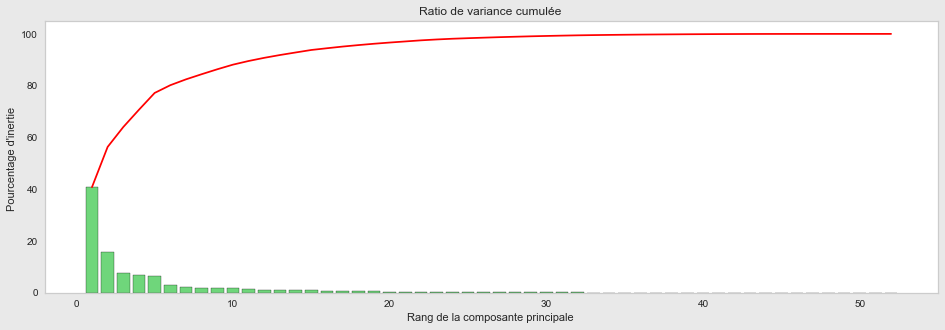

In [17]:
display_scree_plot(pca)

In [18]:
scree = pca.explained_variance_ratio_
nbr_pca=0
N=110
for i in range(N):
    a = scree.cumsum()[i]
    if a >= 0.90:
        print("{} composantes principales expliquent au moins 90 % de la variance totale ".format(i))
        print("Valeur exacte de la variance expliquée : {}%".format(round(a*100,2)))
        nbr_pca=i
        break
pca = PCA(n_components=nbr_pca)
X_pca=pca.fit_transform(X)

11 composantes principales expliquent au moins 90 % de la variance totale 
Valeur exacte de la variance expliquée : 90.76%


In [19]:
df_pca=pd.DataFrame(X_pca)
col=["pca "+ str(n+1) for n in df_pca.columns]
df_pca.columns=col
df_pca.head()

,pca 1,pca 2,pca 3,pca 4,pca 5,pca 6,pca 7,pca 8,pca 9,pca 10,pca 11
0,0.005375,-1.056773,-0.047217,-1.219584,1.361386,-0.641109,-0.226749,-0.123230,0.608990,0.057175,0.041575
1,-1.296910,-0.399478,0.683076,-0.520413,-0.723649,0.092740,0.646878,0.505103,0.212012,0.571557,-0.015631
2,-0.392432,1.786057,-1.153670,-0.845829,1.247500,0.255250,0.031185,-0.284770,0.109205,-0.250117,0.010316
3,-1.019295,0.654360,-0.812686,0.031089,0.459791,0.522181,-0.727842,0.105593,-0.033104,0.269219,-0.016738
4,0.404138,-0.739816,-0.667570,-0.506893,0.629452,0.443829,-0.733739,0.161564,0.781829,0.217621,0.009281


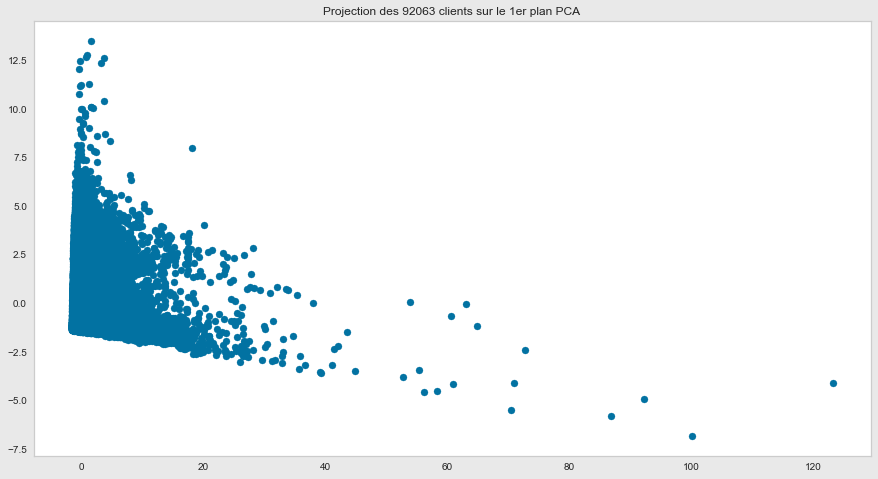

In [20]:
fig=plt.figure(figsize=[15,8])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Projection des {} clients sur le 1er plan PCA ".format(df_pca.shape[0]))
plt.scatter(data=df_pca,x="pca 1",y="pca 2")
plt.grid()

## TSNE Visualisation de données

In [33]:
tsne = TSNE(n_components=2)
T = tsne.fit_transform(df_pca.copy())

C:\Users\Tewod\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Représentation du jeu de données via T-SNE'}>

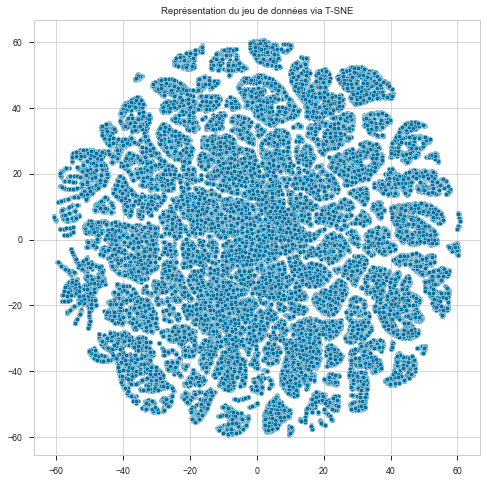

In [189]:
plt.figure(figsize=(8,8))
plt.title('Représentation du jeu de données via T-SNE')
sns.scatterplot(T[:,0], T[:,1])

## k-means

### Elbow-Méthode pour déterminer l'optimum k, nombre de cluster

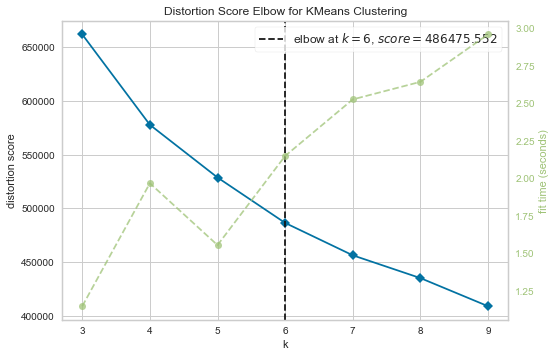

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [115]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,10))

# Adapter les données au visualiseur
visualizer.fit(df_pca)    
visualizer.poof() 

### Commentaire

In [16]:
# Selon à la méthode basée sur le score de distortion (somme moyenne des carrés des distances aux centres), une segementation en  
# K=6 clusters serait la meilleure option.

## k-means Modélisation

In [23]:
# Crée un modèle de clustering k-means
kmeans = KMeans(init='k-means++', n_clusters=6, n_init=10,random_state=42).fit(df_pca)

In [24]:
# Labels
kmeans.labels_

array([3, 1, 0, ..., 1, 3, 1])

In [25]:
# Prédire les étiquettes de cluster 
clusters=kmeans.predict(df_pca)
clusters

array([3, 1, 0, ..., 1, 3, 1])

In [26]:
# Ajouté le type de cluster aux données d'origine

k_means_clustered = pd.DataFrame(X, columns=X.columns, index=X.index)

k_means_clustered['cluster'] = clusters


In [27]:
k_means_clustered

,total_orders,payment_sequential,payment_installments,appliances,arts,auto,construction,electronics,fashion,food_drinks,...,x0_SE,x0_SP,x0_TO,x1_canceled,x1_delivered,x2_boleto,x2_credit_card,x2_debit_card,x2_voucher,cluster
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
0000f46a3911fa3c0805444483337064,0.0,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,1.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1.0,0.0,2.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2
fffea47cd6d3cc0a88bd621562a9d061,0.0,0.0,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
ffff371b4d645b6ecea244b27531430a,0.0,0.0,-0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1


### Distances interclusters

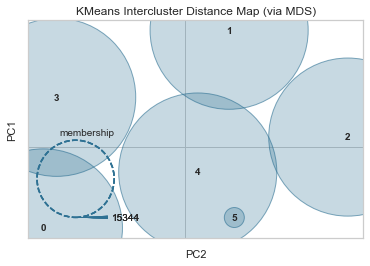

In [104]:
# Generate synthetic dataset with 6 clusters
X1=k_means_clustered.copy()
X1, y = make_blobs(n_samples=92063, n_features=12, centers=6, random_state=42)

model = KMeans(6)
visualizer = InterclusterDistance(model)

visualizer.fit(X1)        
visualizer.show() 

### commentaire

In [ ]:
# Notez cependant qu'étant donné que deux clusters se chevauchent dans l'espace 2D, cela n'implique pas qu'ils se chevauchent dans l'espace des caractéristiques d'origine.

### Numero des clients de chaque clusters

In [211]:
cluster = []
for i in range(6):
    cluster.append(k_means_clustered.loc[k_means_clustered['cluster'] == i])

a = 0
for i in range(6):
    b = cluster[i].shape[0]
    a += b
    print('cluster {} : {} clients'.format(i,b))

cluster 0 : 14204 clients
cluster 1 : 56002 clients
cluster 2 : 475 clients
cluster 3 : 17746 clients
cluster 4 : 3619 clients
cluster 5 : 17 clients


### Projection de l'individu au premier plan de l'ACP via KMeans Cluster

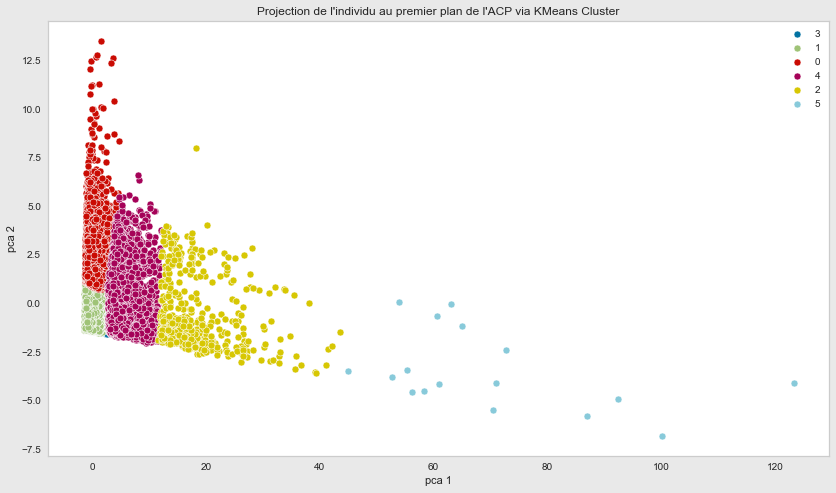

In [24]:
kmeans = KMeans(init='k-means++', n_clusters=6, n_init=10,random_state=42).fit(df_pca)
labels= kmeans.labels_

test=df_pca.loc[:,["pca 1","pca 2"]]
test["cluster kmeans"]=labels
fig=plt.figure(figsize=[14,8])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Projection de l'individu au premier plan de l'ACP via KMeans Cluster")
for clu in test["cluster kmeans"].unique():
    t=test.loc[test["cluster kmeans"]==clu]
    sns.scatterplot(x=t['pca 1'],y= t['pca 2'],label=clu)
plt.legend()
plt.grid()
plt.show()

### Évaluation du modèle K-means :Forme, stabilité et cohérence

In [110]:

df_pca, y = make_blobs(n_samples=92063,
                  n_features=2,
                  centers=6,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=42)  
kmeans = KMeans(init='k-means++',n_clusters=6, random_state=42)
cluster_lables = kmeans.fit_predict(df_pca)
    
print("Pour n_clusters =", 6)
Silhouette_avg = silhouette_score(df_pca, cluster_lables)
print("Silhouette score :", Silhouette_avg)

ARI= adjusted_rand_score(y,cluster_lables)    
print("Adjusted Rand Index :",  ARI)

Homogeneity=homogeneity_score(y,cluster_lables)
print("Homogeneity :", Homogeneity)

Completeness=completeness_score(y,cluster_lables)
print("Completeness :", Completeness)

v_measure=v_measure_score(y,cluster_lables)  
print("v_measure_score :",v_measure)

Adjusted_mutual_info=adjusted_mutual_info_score(y,cluster_lables)
print("adjusted_mutual_info_score:", Adjusted_mutual_info)

Pour n_clusters = 6
Silhouette score : 0.5716946732215019
Adjusted Rand Index : 0.8728459112561427
Homogeneity : 0.891294026322406
Completeness : 0.8912941372597079
v_measure_score : 0.8912940817910535
adjusted_mutual_info_score: 0.8912858428793843


## DBSCAN clustering

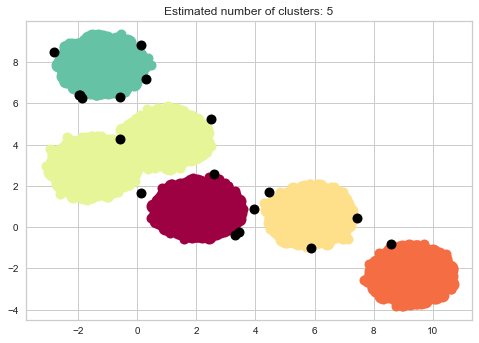

In [5]:
df_pca, labels_true = make_blobs(n_samples=92063, centers=6, cluster_std=0.4,
                            random_state=0)

db = DBSCAN(eps=0.3, min_samples=10).fit(df_pca)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

core_samples_mask[db.core_sample_indices_] = True

labels = db.labels_


# Nombre de clusters dans les étiquettes, en ignorant le bruit s'il est présent.

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


# Le noir a été supprimé et est utilisé pour le bruit à la place..

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noir utilisé pour le bruit.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = df_pca[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = df_pca[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Évaluation du modèle DBSCAN :Forme, stabilité et cohérence

In [8]:

Silhouette_avg = silhouette_score(df_pca, labels)
print("Silhouette score :", Silhouette_avg)

ARI= adjusted_rand_score(labels_true, labels)    
print("Adjusted Rand Index :",  ARI)

Homogeneity=homogeneity_score(labels_true,labels)
print("Homogeneity :", Homogeneity)

Completeness=completeness_score(labels_true, labels)
print("Completeness :", Completeness)

v_measure=v_measure_score(labels_true,labels)  
print("v_measure_score :",v_measure)

Adjusted_mutual_info=adjusted_mutual_info_score(labels_true, labels)
print("adjusted_mutual_info_score:", Adjusted_mutual_info)

Silhouette score : 0.7224789800159716
Adjusted Rand Index : 0.713833519019225
Homogeneity : 0.7495772876661694
Completeness : 0.9951858295455802
v_measure_score : 0.8550945254123571
adjusted_mutual_info_score: 0.8550886651501658


### Hierarchical  Clustering

MemoryError: unable to allocate array data.

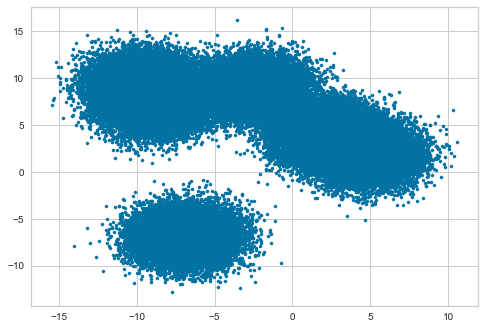

In [2]:
df_pca, y_true = make_blobs(n_samples=92063, n_features=2, centers=6, cluster_std=1.6, random_state=42)

# #Générer des blobs gaussiens isotropes pour le clustering

plt.scatter(df_pca[:, 0], df_pca[:, 1], s=10)
# La dendogram
dendrogram = sch.dendrogram(sch.linkage(df_pca, method='ward'))

In [ ]:
# Commentaire:
# Pour des raisons de problème de mémoire, le clustering hiérarchique n'est pas pratique pour un grand ensemble de données que nous avons.

###  Conclusion: les résultats montrent que k-means est notre meilleur modèle

## L'analyse des clusters

###  Méthode 1: Bar Plot

In [48]:
# ranger et Fusioner les data frame afin d'avoir un Data frame avec le colonne 'cluster' et les données catégorielles codé
# l'idée est d'avoir les colonnes avant les normaliser et sortir l'information des clusters

# étape 1. filtrer l'index avec le cluster correspondant
Separet_df=k_means_clustered.cluster.to_frame()

# étape 2. fusionner avec les données (df1), les données d'origine
df2=pd.merge(df1,Separet_df,on='customer_unique_id')
df2

,total_orders,customer_city,customer_state,order_status,payment_sequential,payment_type,payment_installments,order_purchase_timestamp,appliances,arts,...,health_beauty,home_furniture,office,other,sports_leisure,mean_review_score,most_purchased_item,mean_purchases,mean_delivery_days,cluster
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,cajamar,SP,delivered,1,credit_card,8,2018-05-10 10:56:27,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,5.0,home_furniture,129.90,6.0,3
0000b849f77a49e4a4ce2b2a4ca5be3f,1,osasco,SP,delivered,1,credit_card,1,2018-05-07 11:11:27,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,4.0,health_beauty,18.90,3.0,1
0000f46a3911fa3c0805444483337064,1,sao jose,SC,delivered,1,credit_card,8,2017-03-10 21:05:03,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,3.0,office,69.00,25.0,0
0000f6ccb0745a6a4b88665a16c9f078,1,belem,PA,delivered,1,credit_card,4,2017-10-12 20:29:41,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,electronics,25.99,20.0,1
0004aac84e0df4da2b147fca70cf8255,1,sorocaba,SP,delivered,1,credit_card,6,2017-11-14 19:45:42,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,electronics,180.00,13.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2,sanharo,PE,delivered,1,credit_card,10,2017-06-08 21:00:36,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,5.0,health_beauty,1570.00,27.0,2
fffea47cd6d3cc0a88bd621562a9d061,1,feira de santana,BA,delivered,1,credit_card,1,2017-12-10 20:07:56,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,4.0,health_beauty,64.89,30.0,1
ffff371b4d645b6ecea244b27531430a,1,sinop,MT,delivered,1,credit_card,1,2017-02-07 15:49:16,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,auto,89.90,14.0,1


###  Articles les plus achetés par chaque cluster

In [26]:
# Articles les plus achetés par chaque cluster
# Les résultats sont pareil avec la Plot radar

most_purchased_cluster0=df2[df2['cluster']==0].groupby('cluster')['most_purchased_item'].value_counts().to_frame()
most_purchased_cluster0.head(70)

most_purchased_item
cluster most_purchased_item                     
0       home_furniture                      3034
        electronics                         2477
        health_beauty                       1987
        sports_leisure                      1185
        fashion                             1138
        appliances                           913
        office                               730
        garden_pets                          697
        arts                                 624
        other                                525
        auto                                 510
        construction                         289
        food_drinks                           95

In [27]:
most_purchased_cluster1=df2[df2['cluster']==1].groupby('cluster')['most_purchased_item'].value_counts().to_frame()
most_purchased_cluster1.head(70)

most_purchased_item
cluster most_purchased_item                     
1       electronics                         9972
        home_furniture                      8617
        health_beauty                       8378
        sports_leisure                      5904
        appliances                          4337
        fashion                             3916
        arts                                3190
        garden_pets                         3182
        auto                                2312
        office                              2290
        other                               2078
        construction                        1099
        food_drinks                          728

In [28]:
most_purchased_cluster2=df2[df2['cluster']==2].groupby('cluster')['most_purchased_item'].value_counts().to_frame()
most_purchased_cluster2.head(70)

most_purchased_item
cluster most_purchased_item                     
2       electronics                          100
        appliances                            65
        sports_leisure                        63
        fashion                               54
        health_beauty                         37
        auto                                  36
        garden_pets                           35
        home_furniture                        27
        construction                          22
        office                                16
        other                                 14
        arts                                   5
        food_drinks                            1

In [29]:
most_purchased_cluster3=df2[df2['cluster']==3].groupby('cluster')['most_purchased_item'].value_counts().to_frame()
most_purchased_cluster3.head(70)

most_purchased_item
cluster most_purchased_item                     
3       home_furniture                      4136
        health_beauty                       3090
        fashion                             1804
        sports_leisure                      1578
        electronics                         1291
        appliances                          1275
        other                                953
        garden_pets                          881
        office                               825
        arts                                 766
        auto                                 630
        construction                         450
        food_drinks                           66

In [30]:
most_purchased_cluster4=df2[df2['cluster']==4].groupby('cluster')['most_purchased_item'].value_counts().to_frame()
most_purchased_cluster4.head(70)

most_purchased_item
cluster most_purchased_item                     
4       electronics                          589
        fashion                              572
        health_beauty                        564
        appliances                           314
        home_furniture                       301
        sports_leisure                       258
        other                                231
        garden_pets                          177
        auto                                 165
        office                               153
        arts                                 151
        construction                         137
        food_drinks                            7

In [31]:
most_purchased_cluster5=df2[df2['cluster']==5].groupby('cluster')['most_purchased_item'].value_counts().to_frame()
most_purchased_cluster5.head(70)

most_purchased_item
cluster most_purchased_item                     
5       electronics                            5
        appliances                             3
        health_beauty                          3
        sports_leisure                         3
        office                                 2
        arts                                   1

<AxesSubplot:xlabel='cluster', ylabel='total_orders'>

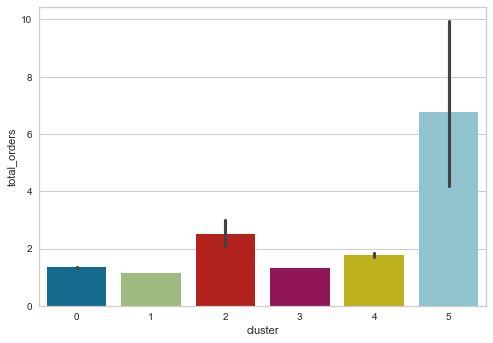

In [146]:
# Cluster 1= Minimum nombre de commande

# Cluster 5= Maximum nombre de commande

sns.barplot(x = df2['cluster'],
            y =df2['total_orders'])


### la note moyenne des clients

<AxesSubplot:xlabel='cluster', ylabel='mean_review_score'>

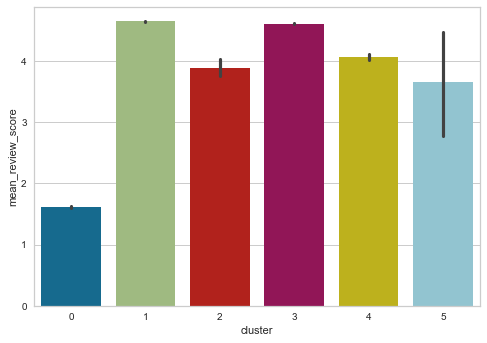

In [147]:
#Cluster 0= Les moins satisfaits
#Cluster 1= les plus satisfaits
#Cluster 2= assez satisfait
#Cluster 3= les plus satisfaits
#Cluster 4= assez satisfait
#Cluster 6= assez satisfait

sns.barplot(x = df2['cluster'],
            y =df2['mean_review_score'])

### La dépense pas des clusters

<AxesSubplot:xlabel='cluster', ylabel='mean_purchases'>

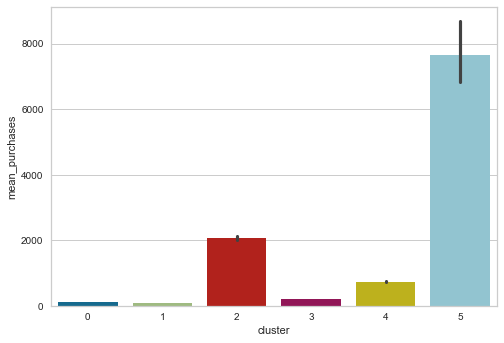

In [148]:
# cluster 0= économe
# Cluster 1= économe
# cluster 2= hésitant
# cluster 3= économe
# cluster 4= hésitant
# cluster 5= dépensiers

sns.barplot(x = df2['cluster'],
            y = df2['mean_purchases'])

### Délai de livraison

<AxesSubplot:xlabel='cluster', ylabel='mean_delivery_days'>

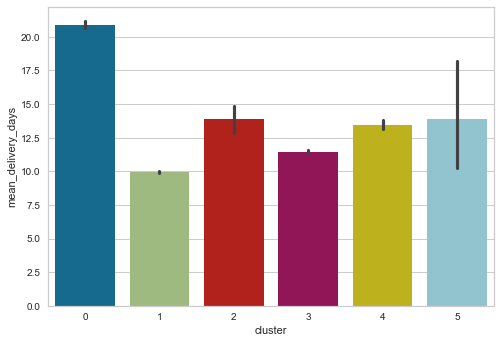

In [155]:
# cluster 0= long délai de livraison
# Cluster 1= délai de livraison le plus court
# cluster 2= délai de livraison modéré
# cluster 3= délai de livraison court
# cluster 4= délai de livraison modéré
# cluster 5= délai de livraison modéré



sns.barplot(x = df2['cluster'],
            y = df2['mean_delivery_days'])

###  Analyse des caractéristiques par chaque cluster

In [ ]:
# Group 1: Les clients économe

# Ces clients ont acheté des des articles mixte de  CONSOMMATION et DURABLE. Plus achetée: Home_furniture

# Ces clients commandent les moins au comparaison d'autres.

# Ces clients sont économe.

# le service de livraison prends LE PLUS DE TEMPS

# Ils sont MOINS SATISFAITS de leur évaluation du service par rapport aux autres clients.


# stratégie marketing:
# nous proposons d'offrir le même catégorie de produit mais qui sont moins chers
# nous proposons d'accorder des remises spéciales sur les produits 


In [ ]:
# Group 2: les clients satisfait

# Ces clients ont acheté des articles mixte de  CONSOMMATION et DURABLE.Plus achetée: Electronics et Home_furniture

# Ces clients sont économe.

# Ils sont très satisfaits

# Leurs commandes sont arrivées RAPIDEMENT.

# stratégie marketing:

# nous proposons d'offrir le même catégorie de produit mais qui sont moins chers

# nous proposons d'accorder des remises spéciales sur les produits.


In [ ]:
# Group 3: les clients avec un fort potentiel pour vendre plus

# Ces clients ont acheté des des articles mixte de  CONSOMMATION et DURABLE. Plus achetée: Home_furniture

# Ils achètent plus avec moins de prix. Comparez le montant des commandes avec le montant des dépenses.

# Ces clients HÉSITANT à dépenser.

# Leur commande a MOYENNE DES TEMPS de livraison.

# Ils sont ASSEZ satisfaits par rapport aux autres clients.

# stratégie marketing:

# nous proposons d'offrir le même catégorie  de produit mais qui sont moins chers.


In [ ]:
# Group 4: Les clients ambivalent

# Ces clients ont acheté des des articles mixte de  CONSOMMATION et DURABLE.Plus achetée: Home_furniture et health_beauty

# Ces clients sont économe.

# Ils sont trés satisfait relativement.

# Leurs commandes sont arrivées assez RAPIDEMENT.

# stratégie marketing:

# nous proposons d'offrir le même catégorie de produit mais qui sont moins chers.

In [ ]:
# Group 5: Les clients à reconquerir

# Ces clients ont acheté des des articles mixte de  CONSOMMATION et DURABLE. Plus achetée: Electronics

# Ils sont hésitant à dépenser.

# Le service de livraison est assez rapide.

# Ils sont ASSEZ satisfaits.

# stratégie marketing:

# Nous proposons d'offrir le même produit mais qui sont moins chers

# Nous proposons d'accorder des remises spéciales sur les produits 

In [ ]:
# Group 6: Les clients les plus dépensiers

# Ces clients ont acheté des des articles mixte de  CONSOMMATION et DURABLE.Plus achetée: Electronics

# Ces clients sont les plus gros dépensiers.

# Ils commandent la MAXIMUM au comparaison.

# Ils sont ASSEZ satisfaits.

# Le service de livraison est assez rapide.

#  stratégie marketing:
# Nous proposons d'offrir des produits similaires qui sont plus cher et d'autres produits qu'un client n'a pas achetés.

## Méthode 2:Plot radar 

In [84]:
customer_types = ['Les clients économe','les clients satisfait','les clients avec un fort potentiel pour vendre plus','Les clients ambivalent','Les clients à reconquerir','Les clients les plus dépensiers']

In [112]:
df2_filtered=df2[["cluster","total_orders",'mean_review_score','mean_delivery_days','mean_purchases']]

In [113]:
def setCustomersType(x, customer_types = customer_types ):
    return customer_types[x]

In [114]:
df2_filtered['customer_types']  = df2_filtered['cluster'].apply(lambda x: setCustomersType(x))

<ipython-input-114-3b6a13daae4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered['customer_types']  = df2_filtered['cluster'].apply(lambda x: setCustomersType(x))


In [115]:
df2_filtered=df2_filtered.reset_index()
df2_filtered

,customer_unique_id,cluster,total_orders,mean_review_score,mean_delivery_days,mean_purchases,customer_types
0,0000366f3b9a7992bf8c76cfdf3221e2,3,1,5.0,6.0,129.90,Les clients ambivalent
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1,4.0,3.0,18.90,les clients satisfait
2,0000f46a3911fa3c0805444483337064,0,1,3.0,25.0,69.00,Les clients économe
3,0000f6ccb0745a6a4b88665a16c9f078,1,1,4.0,20.0,25.99,les clients satisfait
4,0004aac84e0df4da2b147fca70cf8255,3,1,5.0,13.0,180.00,Les clients ambivalent
...,...,...,...,...,...,...,...
92058,fffcf5a5ff07b0908bd4e2dbc735a684,2,2,5.0,27.0,1570.00,les clients avec un fort potentiel pour vendre...
92059,fffea47cd6d3cc0a88bd621562a9d061,1,1,4.0,30.0,64.89,les clients satisfait
92060,ffff371b4d645b6ecea244b27531430a,1,1,5.0,14.0,89.90,les clients satisfait
92061,ffff5962728ec6157033ef9805bacc48,3,1,5.0,11.0,115.00,Les clients ambivalent


In [167]:
# visualisation des clusters (radar)
def radar_plot(data, label_score, colors, sub_plot=[3, 3], figsize=(37, 20)):

    """
    Pour chaque cluster/segments, trace un radar chart représentant
    la moyenne des individus pour les variables.
    data: Le tableau de données comporte quatre variables qui indiquent moyenne d'achetés, 
    le délai de livraison, la mesure de la satisfaction client, et nombre de commande.
    label_score: nom de la segmentation
    colors(list): code couleur
    """

    # Aggrégation par moyenne des valeurs par segment
    df_plot = data.groupby([label_score]).agg("mean")

    # Transformation MinMax -> [0, 1]
    df_plot_std = pd.DataFrame(MinMaxScaler().fit_transform(df_plot),
                           columns=list(df_plot.columns),
                           index=df_plot.index)

    # Noms des variables
    categories = list(df_plot.columns)
    # Nombre de variables
    N = len(categories)
    
  
    # On divise un tour complet par le nombre de variables
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    fig = plt.figure(1, figsize=figsize)

    # Trace un radar chart pour chaque segment
    for i, segment in enumerate(data[label_score].unique()):

        ax = fig.add_subplot(sub_plot[0], sub_plot[1], i + 1, polar=True)

        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)
        ax.set_rlabel_position(0)

        # Draw one axe per variable + add labels labels yet
        plt.yticks(color="grey", size=17)
        values = list(df_plot_std.loc[segment].values)
        values += values[:1]
        ax.plot(angles, values, colors[segment],
                'o-', linewidth=4, linestyle='solid')
        ax.fill(angles, values, colors[segment], alpha=0.30)
        ax.set_xticks(angles)
        ax.set_xticklabels(categories, size=21)
        plt.yticks([-1, -0.5, 0, 0.5, 1],
                   ["-1", "-0.5", "0", "0.5", "1"],
                   color="black",
                   size=18)
        ax.set_title(segment, size=28, color=colors[segment])
        ax.grid(True)
        plt.ylim(-1, 1)

    plt.show()

In [168]:
palette_1 = sns.color_palette("husl", len(customer_types ))
colors_1 = {label: color for label, color in zip(customer_types , palette_1.as_hex())}
colors_1

{'Les clients économe': '#f77189',
 'les clients satisfait': '#bb9832',
 'les clients avec un fort potentiel pour vendre plus': '#50b131',
 'Les clients ambivalent': '#36ada4',
 'Les clients à reconquerir': '#3ba3ec',
 'Les clients les plus dépensiers': '#e866f4'}

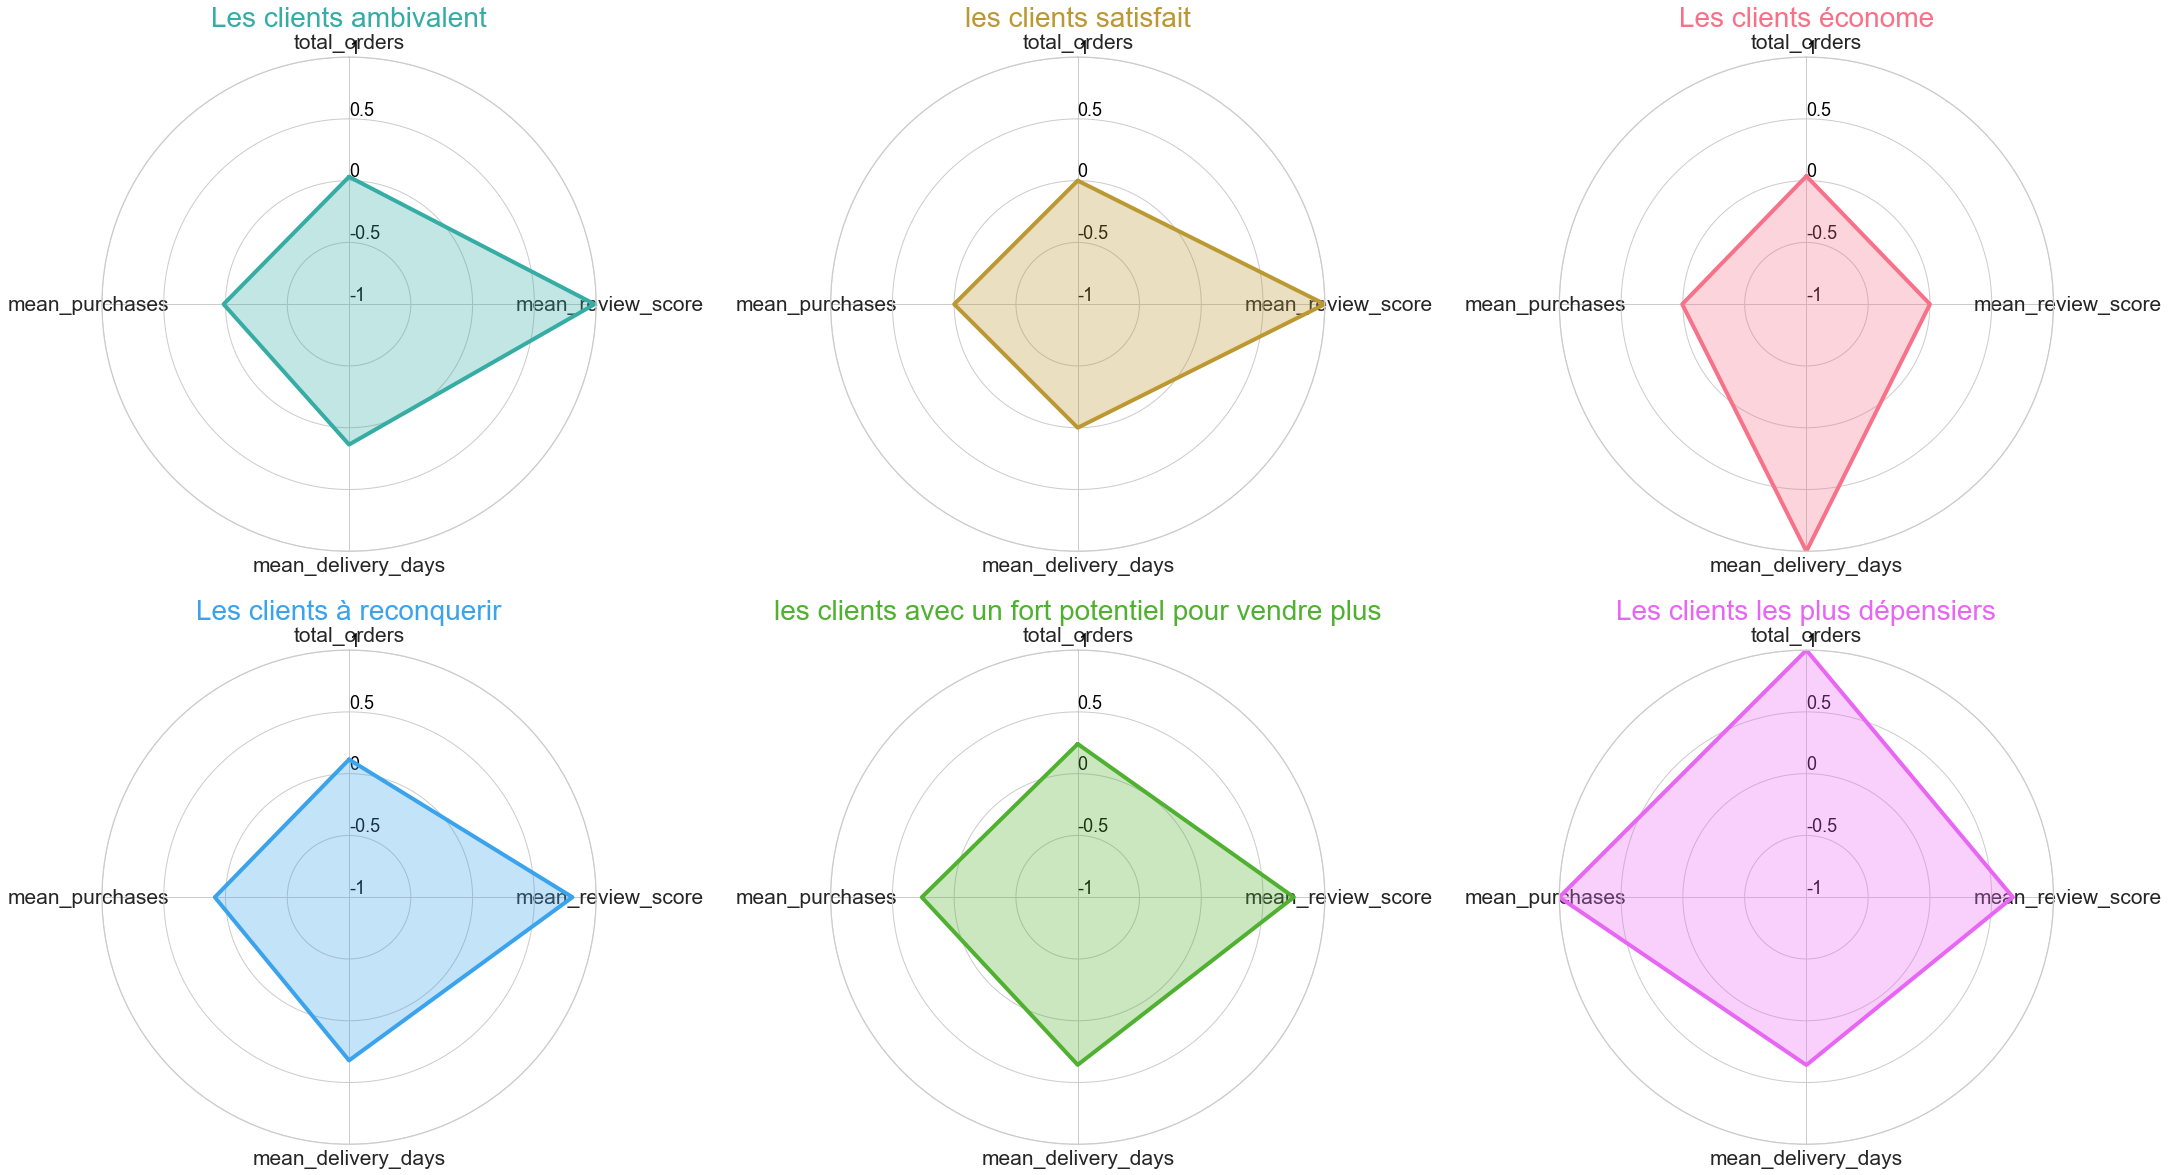

In [169]:
# Radar plot pour la segmentation
radar_plot(df2_filtered.drop(columns=['cluster']) ,'customer_types',  colors_1, sub_plot=[2, 3])

## La fréquence de contrat de maintenance

In [173]:

# filtrer l'index avec le cluster correspondant
#order_period=df.order_purchase_timestamp.to_frame()


In [174]:
df1

,total_orders,customer_city,customer_state,order_status,payment_sequential,payment_type,payment_installments,order_purchase_timestamp,appliances,arts,...,garden_pets,health_beauty,home_furniture,office,other,sports_leisure,mean_review_score,most_purchased_item,mean_purchases,mean_delivery_days
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,cajamar,SP,delivered,1,credit_card,8,2018-05-10 10:56:27,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,5.0,home_furniture,129.90,6.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,osasco,SP,delivered,1,credit_card,1,2018-05-07 11:11:27,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,4.0,health_beauty,18.90,3.0
0000f46a3911fa3c0805444483337064,1,sao jose,SC,delivered,1,credit_card,8,2017-03-10 21:05:03,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,3.0,office,69.00,25.0
0000f6ccb0745a6a4b88665a16c9f078,1,belem,PA,delivered,1,credit_card,4,2017-10-12 20:29:41,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,electronics,25.99,20.0
0004aac84e0df4da2b147fca70cf8255,1,sorocaba,SP,delivered,1,credit_card,6,2017-11-14 19:45:42,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,electronics,180.00,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2,sanharo,PE,delivered,1,credit_card,10,2017-06-08 21:00:36,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,5.0,health_beauty,1570.00,27.0
fffea47cd6d3cc0a88bd621562a9d061,1,feira de santana,BA,delivered,1,credit_card,1,2017-12-10 20:07:56,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,4.0,health_beauty,64.89,30.0
ffff371b4d645b6ecea244b27531430a,1,sinop,MT,delivered,1,credit_card,1,2017-02-07 15:49:16,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,auto,89.90,14.0


In [175]:
# La dernière commande
df1.order_purchase_timestamp.max()

Timestamp('2018-08-29 15:00:37')

In [176]:
# La commande la plus ancienne
df1.order_purchase_timestamp.min()

Timestamp('2016-10-03 16:56:50')

In [177]:
time_delta = int((df1.order_purchase_timestamp.max() - df1.order_purchase_timestamp.min())/np.timedelta64(1,'M'))
print("La période complète des commandes porte sur {} mois.".format(time_delta))

La période complète des commandes porte sur 22 mois.


### data initial: nous découpons les données des 12 premiers mois en tant que données initiales.

In [178]:
# l'échantillons pour les 12 premiers mois

data_initial=df1[df1['order_purchase_timestamp']<= '2017-10-31 23:59:59']

# sélecter et éviter les données catégoriel

categorical_columns = data_initial.select_dtypes(['category','object']).columns


data_initial.drop(categorical_columns, axis=1,inplace=True)


data_initial=  data_initial.drop(["order_purchase_timestamp"],axis =1)

# Normaliser les données et transformer

rs = RobustScaler()

data_initial_scaled=rs.fit_transform(data_initial)


C:\Users\Tewod\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


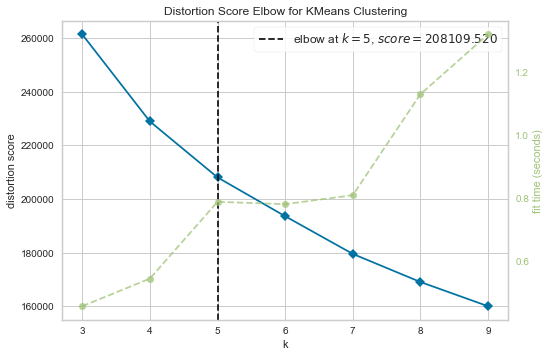

In [74]:
# Elbow methodé pour l'optimum k pour l'échantillon initial

model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,10))

# Adapter les données au visualiseur
visualizer.fit(data_initial_scaled)    
visualizer.poof() 

In [182]:
# K-means sur l'échantillon initial

kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10,random_state=42)

kmeans.fit(data_initial_scaled)

#prédiction des clusters
clusters_initial=kmeans.predict(data_initial_scaled)

# intégrer les clusters avec la base de données
initial_clustered = pd.DataFrame(data_initial_scaled, columns=data_initial.columns, index=data_initial.index)

#renommer
initial_clustered['cluster_initial'] = clusters_initial

#découpage du cluster pour chaque client    
initial_labels = initial_clustered["cluster_initial"].reset_index()
    

### le données moins de 6 dernier mois ....et les  6 derniers mois

In [183]:
df_minus6= df1[df1['order_purchase_timestamp']<= '2018-02-28 23:59:59']

df_minus5= df1[df1['order_purchase_timestamp']<= '2018-03-31 23:59:59']

df_minus4= df1[df1['order_purchase_timestamp']<= '2018-04-30 23:59:59']

df_minus3= df1[df1['order_purchase_timestamp']<= '2018-05-31 23:59:59']

df_minus2= df1[df1['order_purchase_timestamp']<= '2018-06-30 23:59:59']

df_minus1= df1[df1['order_purchase_timestamp']<= '2018-07-31 23:59:59']

df_minus0= df1[df1['order_purchase_timestamp']<= '2018-08-29 15:00:37']

### calculer de l'ARI en itération pour le données moins de 6 dernier mois ....et en ajoutant les 6 derniers mois

In [184]:
ari_score = []

data_months= [df_minus6,df_minus5, df_minus4, df_minus3, df_minus2, df_minus1, df_minus0]

for test_data in data_months:

    
    # éviter la colonne "order_purchase"
    test_data =  test_data.drop(["order_purchase_timestamp"],axis =1)
    
    #identifier les données catégorielles
    categorical_columns = test_data.select_dtypes(['category','object']).columns
     
    # éviter les colonnes catégorielles
    test_data.drop(categorical_columns, axis=1,inplace=True)
    
    # normalisation avec RobusScaler et transformer
    rs = RobustScaler()

    test_data_scaled=rs.fit_transform(test_data)

           
    
    # k-means de données initial (pour la period de 12 mois initials)
    
    
    kmeans_model = KMeans(init='k-means++', n_clusters=5, n_init=10,random_state=42)

    kmeans_model.fit(test_data_scaled)
    
    predictions = kmeans_model.predict(test_data_scaled) ## les clusters sur le nouveau echantillon
       
    Test_data_clustered = pd.DataFrame(test_data_scaled, columns=test_data.columns, index=test_data.index)
    
    Test_data_clustered['cluster_test'] = predictions 
  
    test_data_labels = Test_data_clustered['cluster_test'].reset_index()

    # Filter les client sur l'échantillon de initial de 12 mois
    
    data_compare = pd.merge( test_data_labels, initial_labels ,on=['customer_unique_id'])

    # sortir les labels
    test_KMlabel = data_compare['cluster_test']
  
    initial_KMlabel = data_compare['cluster_initial']
    
    # calcule l'ARI
    ari_p = adjusted_rand_score(test_KMlabel,initial_KMlabel)
    
    ari_score.append(ari_p)

results = pd.DataFrame(data=ari_score, columns=["ari_score"],index=['df_minus6','df_minus5', 'df_minus4', 'df_minus3', 'df_minus2', 'df_minus1', 'df_minus0'])

 

results

,ari_score
df_minus6,0.899665
df_minus5,0.893930
df_minus4,0.704336
df_minus3,0.891920
df_minus2,0.562268
df_minus1,0.624449
df_minus0,0.931794


Text(0, 0.5, 'ARI')

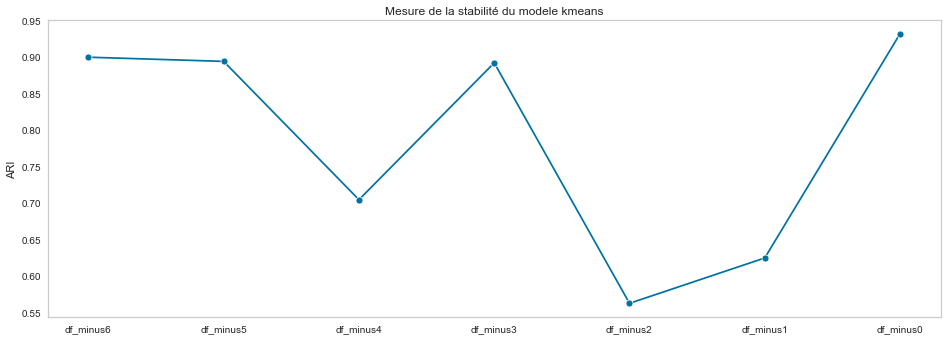

In [185]:
## visualisation de stabilité du modele kmeans
# Le résultat montre que le résultat ARI diminue au troisième mois.
# Ainsi, la mise à jour sur les clusters peut être effectuée tous les TROIS mois.

plt.figure(5,figsize=(16,12))
 
plt.subplot(2,1,1)
 
plt.grid()

sns.lineplot(x=results.index, y="ari_score",data=results , marker='o')
 
plt.title("Mesure de la stabilité du modele kmeans")

plt.ylabel("ARI")